<a href="https://colab.research.google.com/github/arunprasath2007/FrameworkILoveAndToExperiment/blob/master/fastai_ch7_tta_furtherreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 13.1MB/s 
     |████████████████████████████████| 194kB 50.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 40kB 7.4MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 2.6MB 51.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *

(500, 500)

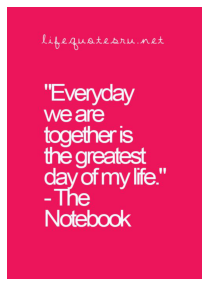

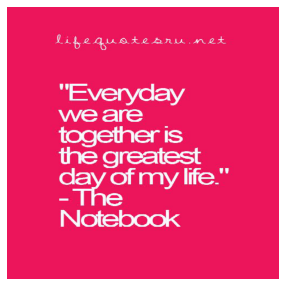

In [11]:
img = PILImage.create('quote.jpg')
show_image(img)
img = img.reshape(h=500, w=500)
show_image(img)
img.shape

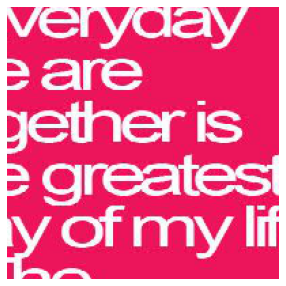

In [12]:
center = img.crop_pad(200)
show_image(center)

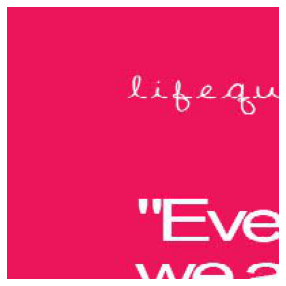

In [13]:
#left, top, right, bottom
ul = img.crop((0,0,200, 200))
show_image(ul)

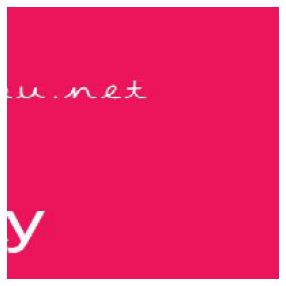

In [15]:
ur = img.crop((300,0,500, 200))
show_image(ur)

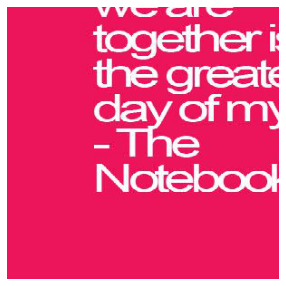

In [20]:
ll = img.crop((0,200,300, 500))
show_image(ll)

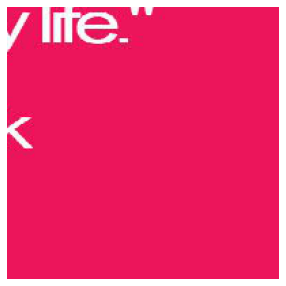

In [26]:
lr = img.crop((300,300,500, 500))
show_image(lr)

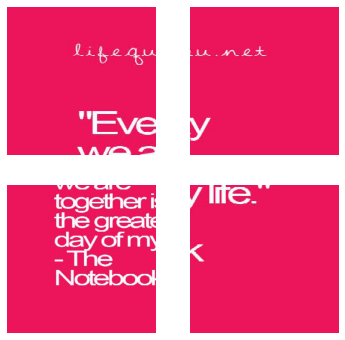

In [28]:
cropped_images = [ul, ur, ll, lr]

fig, axs = plt.subplots(2,2, figsize=(6,6))

for o, ax in zip(cropped_images, axs.flatten()):
    show_image(o, ax)

In [34]:
def crop_images(img, size):
  h,w = img.shape
  center = img.crop_pad(size)
  ul= img.crop((0,0,0+size,0+size))
  ur= img.crop((w-size, 0, w, size))
  ll= img.crop((0, h-size, size, h))
  lr= img.crop((w-size, h-size, w, h))

  return center, ul, ur, ll, lr

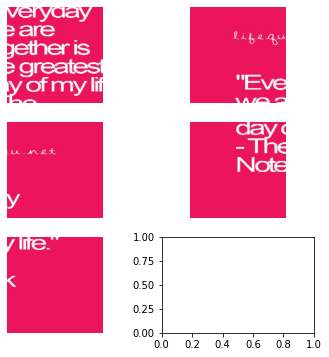

In [37]:
cropped_images = crop_images(img, 200)

fig, axs = plt.subplots(3,2, figsize=(6,6))

for o, ax in zip(cropped_images, axs.flatten()):
    show_image(o, ax)

In [43]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
(path/'images').ls()

(#7393) [Path('images/Sphynx_179.jpg'),Path('images/basset_hound_84.jpg'),Path('images/shiba_inu_4.jpg'),Path('images/leonberger_1.jpg'),Path('images/Birman_59.jpg'),Path('images/great_pyrenees_96.jpg'),Path('images/Siamese_28.jpg'),Path('images/saint_bernard_123.jpg'),Path('images/Maine_Coon_104.jpg'),Path('images/leonberger_44.jpg')...]

In [45]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=using_attr(RegexLabeller('(.+)_\d+.jpg$'), 'name'),
                   item_tfms=Resize(200),
                   batch_tfms=aug_transforms(size=200, min_scale=0.75))

dls = dblock.dataloaders(path/'images')

In [46]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.997406,0.394991,0.882950,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.425278,0.372644,0.884303,01:07
1,0.401605,0.418287,0.878214,01:08
2,0.275201,0.376418,0.901218,01:09
3,0.145850,0.300908,0.911367,01:09
4,0.096426,0.271021,0.912043,01:09


In [47]:
learn.dls.train.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> RandomResizedCropGPU -- {'size': (200, 200), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [48]:
learn.dls.valid.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> RandomResizedCropGPU -- {'size': (200, 200), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [54]:
class UpperLeft(Transform):
    def __init__(self, size):
        self.size = size
    
    def encodes(self, img:TensorImage):
        _, _, h, w = img.shape
        return img[..., :self.size, :self.size]

class UpperRight(Transform):
    def __init__(self, size):
        self.size = size
    
    def encodes(self, img:TensorImage):
        _, _, h, w = img.shape
        return img[..., :self.size, w-self.size:]

class LowerLeft(Transform):
    def __init__(self, size):
        self.size = size
    
    def encodes(self, img:TensorImage):
        _, _, h, w = img.shape
        return img[..., h-self.size:, :self.size]

class LowerRight(Transform):
    def __init__(self, size):
        self.size = size
    
    def encodes(self, img:TensorImage):
        _, _, h, w = img.shape
        return img[..., h-self.size:, w-self.size:]

In [59]:
def tta_cc(learn, dl, size):
    tfms = [UpperLeft(size), UpperRight(size), LowerLeft(size), LowerRight(size)]
    tta_preds = []
    # get predictions for default approach on validation sets that uses the center crop
    preds, targs = learn.get_preds()
    tta_preds.append(preds[None])
    # get predictions using each of the four corner crops
    for tfm in tfms:
        dl = dl.new(after_batch=Pipeline([IntToFloatTensor, tfm]))
        tta_preds.append(learn.get_preds(dl=dl, inner=True)[0][None])
    
    tta_preds = torch.cat(tta_preds).mean(0)
    return tta_preds, targs

In [61]:
preds, target = tta_cc(learn=learn, dl=learn.dls.valid, size=200)
accuracy(preds, target)

tensor(0.7368)

In [57]:
learn.dls.valid

In [58]:

preds, targs = learn.tta(dl=learn.dls.valid)
accuracy(preds, targs)

tensor(0.9391)